In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
# Read train & test data from `clean_data` directory
train_data = pd.read_csv('../clean_data/train_task_a.csv')
test_data = pd.read_csv('../clean_data/test_task_a.csv')

In [4]:
# Sarcastic Tweet Count
print(train_data.groupby('sarcastic')['sarcastic'].count())

sarcastic
0    2600
1     867
Name: sarcastic, dtype: int64


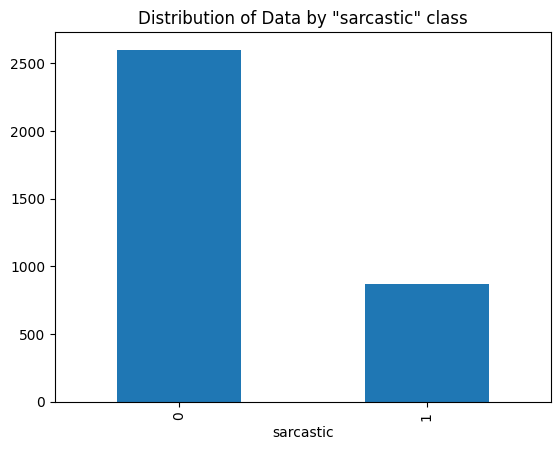

In [5]:
# Visualize data grouped by 'sarcastic' class
train_data['sarcastic'].value_counts().plot(kind='bar')
plt.title('Distribution of Data by "sarcastic" class')
plt.show()

In [6]:
# Split train-test data into 70/30 splits
X = np.array(train_data['tweet']).astype('str')
y = np.array(train_data['sarcastic']).astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=False)

In [7]:
# Create Vectorization Layer and adapt over training data
vectorization_layer = tf.keras.layers.TextVectorization(max_tokens=10000, output_mode='int')
vectorization_layer.adapt(X_train)

print('Size of vocabulary:', len(vectorization_layer.get_vocabulary()))

Size of vocabulary: 7644


In [8]:
# Create Model
model = tf.keras.Sequential([
    vectorization_layer,
    tf.keras.layers.Embedding(input_dim=len(vectorization_layer.get_vocabulary()), output_dim=64),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, dropout=0.5, kernel_regularizer=tf.keras.regularizers.l2(0.5), recurrent_regularizer=tf.keras.regularizers.l2(0.5))),
    tf.keras.layers.Dense(1, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[tf.keras.metrics.F1Score(threshold=0.5)])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, None, 64)          489216    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 555393 (2.12 MB)
Trainable params: 555393 (2.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [9]:
# Fit Model to Training Data
history = model.fit(X_train, np.array(y_train), epochs=10, validation_split=0.3)

Epoch 1/10
54/54 [==============================] - 4s 23ms/step - loss: 94.1687 - f1_score: 0.3928 - val_loss: 42.3869 - val_f1_score: 0.3947
Epoch 2/10
54/54 [==============================] - 1s 14ms/step - loss: 22.8660 - f1_score: 0.3928 - val_loss: 9.8015 - val_f1_score: 0.3947
Epoch 3/10
54/54 [==============================] - 1s 12ms/step - loss: 5.2935 - f1_score: 0.3928 - val_loss: 2.4034 - val_f1_score: 0.3947
Epoch 4/10
54/54 [==============================] - 1s 13ms/step - loss: 1.4878 - f1_score: 0.3928 - val_loss: 0.9204 - val_f1_score: 0.3947
Epoch 5/10
54/54 [==============================] - 1s 13ms/step - loss: 0.7452 - f1_score: 0.3928 - val_loss: 0.6375 - val_f1_score: 0.3947
Epoch 6/10
54/54 [==============================] - 1s 12ms/step - loss: 0.6000 - f1_score: 0.3928 - val_loss: 0.5777 - val_f1_score: 0.3947
Epoch 7/10
54/54 [==============================] - 1s 12ms/step - loss: 0.5673 - f1_score: 0.3928 - val_loss: 0.5634 - val_f1_score: 0.3947
Epoch 8/10

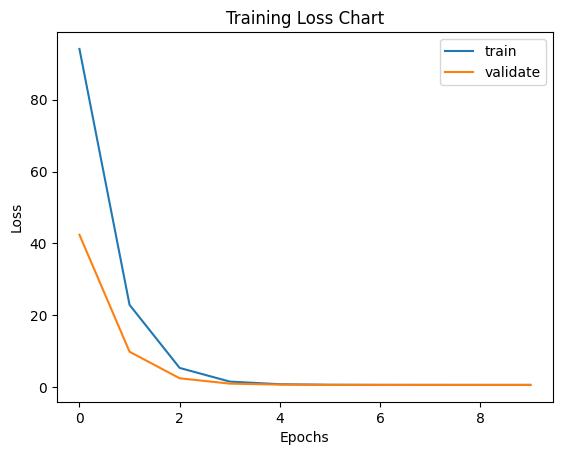

In [10]:
# Plot Error & F1 Score across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validate'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Chart')
plt.show()

In [11]:
# Evaluate with test data of training dataset
loss, f1score = model.evaluate(X_test, np.array(y_test))
print('Loss: ', loss, '| F1-Score:', f1score)

33/33 [==============================] - 0s 4ms/step - loss: 0.5789 - f1_score: 0.4155
Loss:  0.5788894295692444 | F1-Score: [0.4155251]


In [12]:
# Breakdown test data to features and target datasets
test_x = np.array(test_data['tweet']).astype('str')
test_y = np.array(test_data['sarcastic']).astype('float32')

In [13]:
# Evaluate with test data
loss, f1score = model.evaluate(test_x, test_y)
print('Loss: ', loss, '| F1-Score:', f1score)

44/44 [==============================] - 0s 4ms/step - loss: 0.4374 - f1_score: 0.2500
Loss:  0.43736594915390015 | F1-Score: [0.25]
